<a href="https://colab.research.google.com/github/saiachanta21/Heart-Disease-Prediction/blob/main/PCA_FOR_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Authors: Achanta Sai Krishna,Kuralanbu,Vimal Dharshan
#Objective: To apply  neural network on the dataset using gaussian/radial activation function/sigmoid before normalization and after normalization and finding the accuracy of a different networks.
#Input: Dataset
#Output: Accuracy of the different networks.
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
# read the csv
df = pd.read_csv('/content/framingham.csv')

In [ ]:
df.head()


,Sex,age,Chest Pain Type,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop("target", axis=1))
scaled_data=scaler.transform(df.drop("target", axis=1))
scaled_data.shape
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
scaled_data.shape

x_pca.shape


(4240, 2)

In [ ]:
# Load dataset
data = df
# Get features and target
X= x_pca
y=df.target

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.25)#test_train split with test size=25% and train size=75%

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(3180, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
X_train[0]

array([-1.62099663, -1.76007512])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=2, kernel_initializer='normal', activation='gelu'))
    model.add(Dense(8, kernel_initializer='normal',activation='gelu'))
    model.add(Dense(2, activation='gelu'))

    # compile model
    adam = Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                48        
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 2)                 18        
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
318/318 [==============================] - 2s 3ms/step - loss: 0.8953 - accuracy: 0.6959 - val_loss: 0.4057 - val_accuracy: 0.8481
Epoch 2/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8481 - val_loss: 0.4105 - val_accuracy: 0.8481
Epoch 3/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4600 - accuracy: 0.8478 - val_loss: 0.4466 - val_accuracy: 0.8481
Epoch 4/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4450 - accuracy: 0.8481 - val_loss: 0.4203 - val_accuracy: 0.8481
Epoch 5/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.8481 - val_loss: 0.4606 - val_accuracy: 0.8481
Epoch 6/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8478 - val_loss: 0.4445 - val_accuracy: 0.8481
Epoch 7/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4488 - accuracy: 0.8481 - val_loss: 0.4246 - val_accuracy: 0.8481
Epoch 

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Accuracy for radial basis network')
print(accuracy_score(y_test, categorical_pred)*100)

34/34 [==============================] - 0s 1ms/step
Accuracy for radial basis network
64.71698113207547


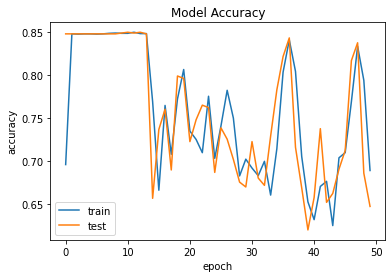

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

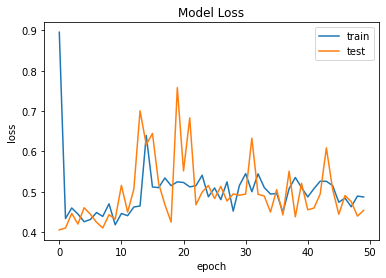

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=2, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(8, kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))

    # compile model
    adam = Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                48        
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dense_32 (Dense)            (None, 2)                 18        
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
318/318 [==============================] - 1s 3ms/step - loss: 0.4294 - accuracy: 0.8481 - val_loss: 0.4216 - val_accuracy: 0.8481
Epoch 2/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8481 - val_loss: 0.4147 - val_accuracy: 0.8481
Epoch 3/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8481 - val_loss: 0.4125 - val_accuracy: 0.8481
Epoch 4/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8481 - val_loss: 0.4077 - val_accuracy: 0.8481
Epoch 5/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4018 - accuracy: 0.8481 - val_loss: 0.4066 - val_accuracy: 0.8481
Epoch 6/50
318/318 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8481 - val_loss: 0.4060 - val_accuracy: 0.8481
Epoch 7/50
318/318 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8481 - val_loss: 0.4062 - val_accuracy: 0.8481
Epoch 

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Accuracy for sigmoid')
print(accuracy_score(y_test, categorical_pred)*100)

34/34 [==============================] - 0s 1ms/step
Accuracy for sigmoid
84.81132075471697


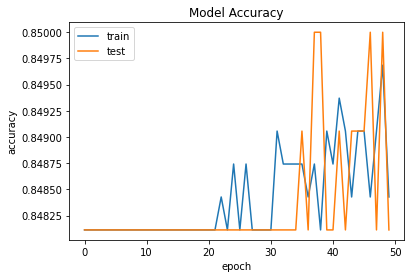

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

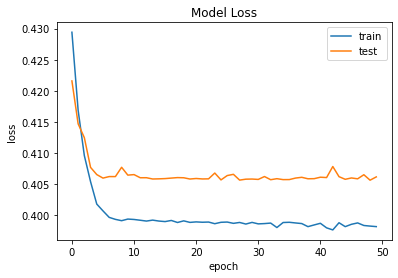

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()